# Multi-label prediction with Planet Amazon dataset

In [ ]:
!pip install fastai==2.0.10

     |████████████████████████████████| 358kB 4.5MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [ ]:
from fastai.vision.all import *

## Get data

In [ ]:
# Install Kaggle API
!pip install -q kaggle
!pip install -q kaggle-cli

     |████████████████████████████████| 81kB 4.6MB/s 
     |████████████████████████████████| 5.3MB 13.3MB/s 
     |████████████████████████████████| 133kB 55.9MB/s 
     |████████████████████████████████| 112kB 62.5MB/s 
     |████████████████████████████████| 51kB 8.3MB/s 


In [ ]:
# only for google colab
import os
os.environ['KAGGLE_USERNAME'] = "<username>" 
os.environ['KAGGLE_KEY'] = "<key>"

In [ ]:
path = Path('planet-amazon')
path.mkdir(parents=True, exist_ok=True)

In [ ]:
! kaggle datasets download nikitarom/planets-dataset -p "{path}" --unzip

 99% 1.48G/1.50G [00:19<00:00, 88.4MB/s]
100% 1.50G/1.50G [00:19<00:00, 84.0MB/s]


In [ ]:
path = path/'planet/planet'

In [ ]:
df = pd.read_csv(path/'train_classes.csv')
df.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [ ]:
dls = ImageDataLoaders.from_df(df, path, folder='train-jpg', valid_pct=0.2, label_delim=' ', suff='.jpg',
                               item_tfms=Resize(460), batch_tfms=aug_transforms(size=224))

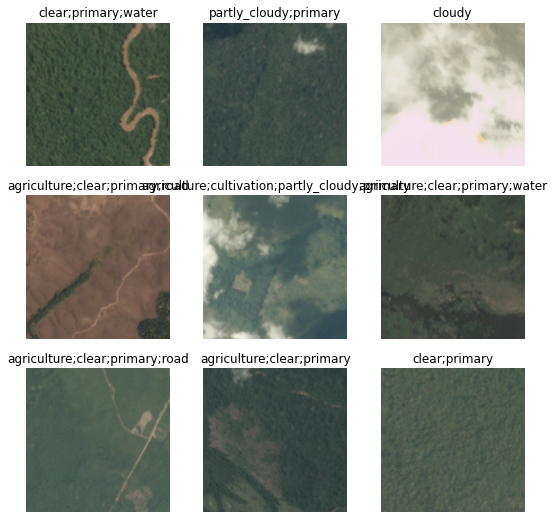

In [ ]:
dls.show_batch()

In [ ]:
planet_amazon_datablock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                                    splitter=RandomSplitter(),
                                    get_x=ColReader('image_name', pref=str(path/'train-jpg') + os.path.sep, suff='.jpg'),
                                    get_y=ColReader('tags', label_delim=' '),
                                    item_tfms = Resize(460),
                                    batch_tfms=aug_transforms(size=224))

In [ ]:
dls = planet_amazon_datablock.dataloaders(df)

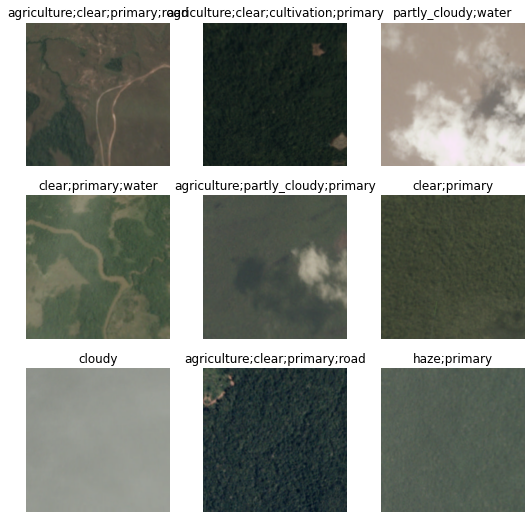

In [ ]:
dls.show_batch()

## Training

In [ ]:
learn = cnn_learner(dls, resnet50, metrics=partial(accuracy_multi, thresh=0.5))

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


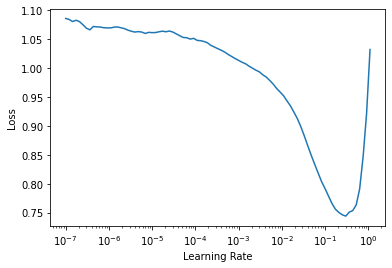

In [ ]:
lr_min, lr_steep = learn.lr_find()

In [ ]:
learn.fine_tune(5, lr_min)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.127660,0.116163,0.957287,05:40


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.116828,0.108346,0.960026,07:05
1,0.112083,0.100086,0.962061,06:55
2,0.106345,0.091773,0.964611,06:53
3,0.092093,0.085618,0.966719,06:51
4,0.090282,0.082404,0.967998,06:50


In [ ]:
learn.unfreeze()

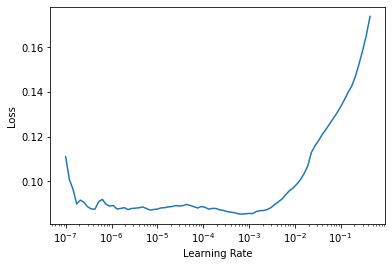

In [ ]:
lr_min, lr_steep = learn.lr_find()

In [ ]:
learn.fine_tune(5, lr_min)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.091409,0.082907,0.967613,06:51
1,0.087600,0.083552,0.967111,06:55
2,0.088509,0.082342,0.968041,06:54
3,0.087655,0.081956,0.968223,06:55
4,0.087453,0.081857,0.968201,06:57


In [ ]:
learn.save('planet-amazon')

Path('models/planet-amazon.pth')

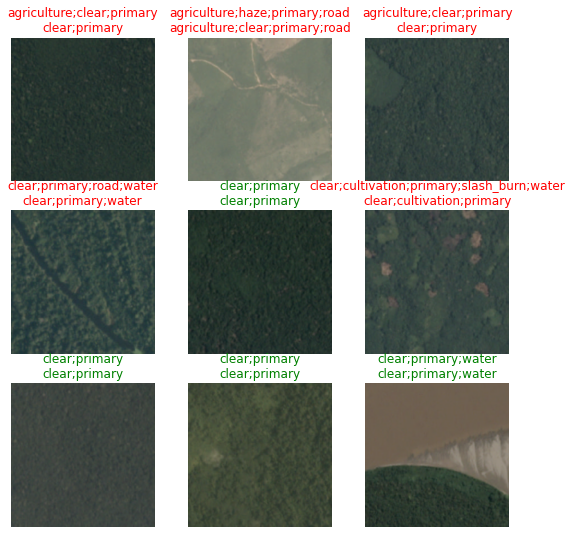

In [ ]:
learn.show_results()

## Interpretation

In [ ]:
interp = Interpretation.from_learner(learn)

In [ ]:
interp.plot_top_losses(9, figsize=(15,15))